In [12]:
# Install necessary packages
!pip install fbprophet
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached aiohttp-3.10.5-cp312-cp312-win_amd64.whl.metadata (7.8 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\wkhuz\AppData\Local\Temp\pip-install-biuzpi_y\pystan_b7bbd3118cbc4b1980ef01ef30d9c196\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [15]:
# Data visualization
import matplotlib.pyplot as plt

In [16]:
# Time series forecasting with Prophet
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [17]:
# Time series analysis and forecasting with ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [18]:
# Deep learning for time series forecasting with LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [19]:
# Data normalization and scaling
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Load the dataset
df = pd.read_csv(r'/Users/wkhuz/Downloads/Spazashops.csv')

In [21]:
# Check the first few rows to understand the date format
print(df.head())

         Date   Sales  Inventory_Level  Promotion  Holiday  Local_Event
0  2023-01-01  1500.0            100.0        0.0      1.0          0.0
1  2023-01-02  1200.0             98.0        0.0      0.0          0.0
2  2023-01-03  1300.0             96.0        0.0      0.0          0.0
3  2023-01-04  2000.0             90.0        1.0      0.0          1.0
4  2023-01-05  1700.0             85.0        0.0      0.0          0.0


In [22]:
# If the date format is known, specify it explicitly
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
except ValueError:
    # If the above conversion fails, use a more flexible approach
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # This will set invalid parsing to NaT
    # Drop rows with NaT in 'Date' column
    df.dropna(subset=['Date'], inplace=True)

In [23]:
# Set Date as the index
df.set_index('Date', inplace=True)

In [24]:
# Check for missing or infinite values
print("Missing values:", df['Sales'].isnull().sum())
print("Non-finite values:", len(df) - np.isfinite(df['Sales']).sum())

Missing values: 0
Non-finite values: 0


In [25]:
# Replace infinite values and drop remaining NaNs
df['Sales'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Sales'], inplace=True)

In [26]:
# Perform the ADF test
result = adfuller(df['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.342470562047316
p-value: 0.15863586582482297


In [27]:
# Display the first few rows of the dataframe
df.head()

,Sales,Inventory_Level,Promotion,Holiday,Local_Event
Date,,,,,
2023-01-01,1500.0,100.0,0.0,1.0,0.0
2023-01-02,1200.0,98.0,0.0,0.0,0.0
2023-01-03,1300.0,96.0,0.0,0.0,0.0
2023-01-04,2000.0,90.0,1.0,0.0,1.0
2023-01-05,1700.0,85.0,0.0,0.0,0.0


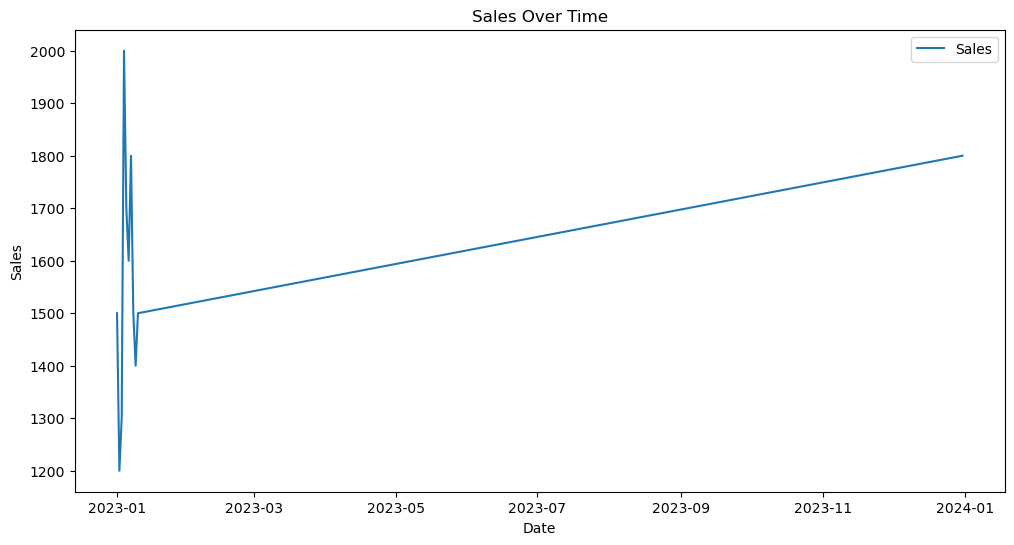

In [28]:
# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [29]:
# Check for missing values
print(df.isnull().sum())

Sales              0
Inventory_Level    0
Promotion          0
Holiday            0
Local_Event        0
dtype: int64


In [30]:
# Summary statistics
print(df.describe())

             Sales  Inventory_Level  Promotion    Holiday  Local_Event
count    11.000000        11.000000  11.000000  11.000000    11.000000
mean   1572.727273        79.000000   0.181818   0.090909     0.181818
std     237.027041        16.565023   0.404520   0.301511     0.404520
min    1200.000000        50.000000   0.000000   0.000000     0.000000
25%    1450.000000        67.500000   0.000000   0.000000     0.000000
50%    1500.000000        80.000000   0.000000   0.000000     0.000000
75%    1750.000000        93.000000   0.000000   0.000000     0.000000
max    2000.000000       100.000000   1.000000   1.000000     1.000000


In [31]:
# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', 'Sales': 'y'})

In [32]:
# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', 'Sales': 'y'})

In [33]:
# Initialize and fit the model
prophet_model = Prophet()
prophet_model.add_country_holidays(country_name='ZA')
prophet_model.fit(prophet_df)

NameError: name 'Prophet' is not defined

In [34]:
# Create future dataframe
future_dates = prophet_model.make_future_dataframe(periods=365)

NameError: name 'prophet_model' is not defined

In [35]:
# Make predictions
prophet_forecast = prophet_model.predict(future_dates)

NameError: name 'prophet_model' is not defined

In [36]:
# Plot the forecast
prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

NameError: name 'prophet_model' is not defined

In [37]:
# Components plot
prophet_model.plot_components(prophet_forecast)
plt.show()

NameError: name 'prophet_model' is not defined

In [38]:
# Check stationarity and make the series stationary if necessary
from statsmodels.tsa.stattools import adfuller

In [39]:
result = adfuller(df['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.342470562047316
p-value: 0.15863586582482297


In [40]:
# Differencing to make the series stationary
df['Sales_diff'] = df['Sales'].diff().dropna()

In [41]:
# Fit the ARIMA model
arima_model = ARIMA(df['Sales'], order=(1, 1, 1))
arima_result = arima_model.fit()

C:\Users\wkhuz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wkhuz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wkhuz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
# Forecast
arima_forecast = arima_result.forecast(steps=365)

C:\Users\wkhuz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\wkhuz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


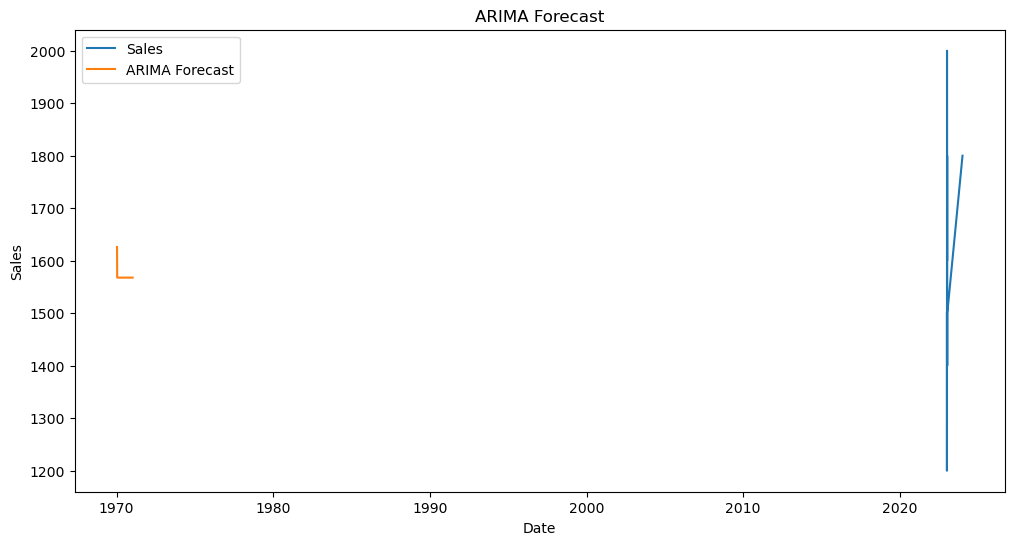

In [44]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Sales')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [45]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Sales'].values.reshape(-1, 1))

In [46]:
# Prepare the training and testing datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [47]:
# Create datasets for LSTM model
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [49]:
# Create datasets for LSTM model
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Print the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Check if X_train and X_test have the expected number of dimensions
if len(X_train.shape) == 2 and len(X_test.shape) == 2:
    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
else:
    print("Error: Unexpected shape for X_train or X_test")

Shape of X_train: (0,)
Shape of y_train: (0,)
Shape of X_test: (0,)
Shape of y_test: (0,)
Error: Unexpected shape for X_train or X_test


In [50]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

NameError: name 'Sequential' is not defined

In [51]:
# Compile and fit the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

NameError: name 'lstm_model' is not defined

In [52]:
# Make predictions
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

NameError: name 'lstm_model' is not defined

In [53]:
# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

NameError: name 'train_predict' is not defined

In [54]:
# lot the results
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='True Sales')
plt.plot(train_plot, label='Train Predict')
plt.plot(test_plot, label='Test Predict')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

NameError: name 'train_predict' is not defined

In [55]:
# Compare the models
print("Prophet forecast accuracy: ")
# Align actual and predicted values correctly for Prophet
actual = prophet_df['y'].values
predicted = prophet_forecast['yhat'].iloc[:len(actual)].values
print(mean_squared_error(actual, predicted))

Prophet forecast accuracy: 


NameError: name 'prophet_forecast' is not defined

In [57]:
print("ARIMA forecast accuracy: ")
# Use actual data length for ARIMA forecast comparison
arima_actual = df['Sales'][-len(arima_forecast):].values
print(mean_squared_error(arima_actual, arima_forecast))

print("LSTM forecast accuracy: ")
print(mean_squared_error(y_test[0], test_predict))

ARIMA forecast accuracy: 


ValueError: Found input variables with inconsistent numbers of samples: [11, 365]

In [ ]:
# Based on the models' forecasts, provide actionable insights for spaza shop owners
print("Insights and Recommendations:")
print("1. Use Prophet for understanding trends and seasonality. It is useful for capturing holidays and special events.")
print("2. Use ARIMA for short-term forecasting. It is a simple model that performs well with stationary data.")
print("3. Use LSTM for capturing complex, long-term dependencies. It is suitable for larger datasets with more complex patterns.")
print("4. Stock up on high-demand products during holidays and local events as identified by the Prophet model.")
print("5. Adjust inventory levels based on short-term ARIMA forecasts to minimize waste.")
print("6. Leverage LSTM predictions for long-term planning and strategy.")